In [2]:
import os
import json
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Centre Location of GoalPost is (120,40) : uses 120 * 80 ground size

def calculateDistance(x, y):
    return math.sqrt((120-x)**2 + (40-y)**2)

def calculateAngle(x, y):
    goalWidth = 7.32
    leftPostCordinate = 40 - goalWidth/2
    rightPostCordinate = 40 + goalWidth/2
    try:
        angle=abs(math.atan2(rightPostCordinate-y, 120-x) - math.atan2(leftPostCordinate-y, 120-x))
        return angle
    except:
        return 0.0

In [4]:
def extractShotFeatures(filePath):
    with open(filePath, 'r', encoding='utf-8') as file:
        data=json.load(file)

    shotData=[]
    for event in data:
        if event.get('type', {}).get('name')=='Shot':
            shot=event.get('shot', {})
            location=event.get('location', [None, None])
            x,y=location if location else (None, None)

            if x is None or y is None:
                continue

            distance=calculateDistance(x, y)
            angle=calculateAngle(x, y)

            freezeFrame=shot.get('freeze_frame', [])
            defenders=[
                player for player in freezeFrame if not player.get('teammate', True)
            ]
            goalkeeperPosition=next(
                (p['location'] for p in freezeFrame if not p.get('teammate', True) and p.get('position', {}).get('name')=='Goalkeeper'),
                [None, None]
            )

            shotData.append({
                'matchID': event.get('match_id', os.path.basename(filePath)),
                'teamName': event.get('team', {}).get('name'),
                'playerName': event.get('player', {}).get('name'),
                'location_x': x,
                'location_y': y,
                'endLocation': shot.get('end_location'),
                'bodyPart': shot.get('body_part', {}).get('name'),
                'technique': shot.get('technique', {}).get('name'),
                'shotType': shot.get('type', {}).get('name'),
                'underPressure': event.get('under_pressure', False),
                'numberOfDefenders': len(defenders),
                'goalkeeper_x': goalkeeperPosition[0],
                'goalkeeper_y': goalkeeperPosition[1],
                'distance': distance,
                'angle': angle,
                'isGoal': 1 if shot.get('outcome', {}).get('name')=='Goal' else 0
            })
    return shotData


In [5]:
folderPath='./testData/'
listOfShots=[]
for file in os.listdir(folderPath):
    if(file.endswith('.json')):
        filePath=os.path.join(folderPath, file)
        listOfShots.extend(extractShotFeatures(filePath))


shotsDataFrame=pd.DataFrame(listOfShots)
shotsDataFrame.head()

,matchID,teamName,playerName,location_x,location_y,endLocation,bodyPart,technique,shotType,underPressure,numberOfDefenders,goalkeeper_x,goalkeeper_y,distance,angle,isGoal
0,3930159.json,Hungary,Attila Szalai,110.6,27.7,"[116.8, 36.0]",Right Foot,Volley,Open Play,False,11,118.9,37.8,15.480633,0.295230,0
1,3930159.json,Hungary,Roland Sallai,98.1,48.0,"[120.0, 45.3, 4.5]",Right Foot,Normal,Open Play,False,8,117.3,41.9,23.315446,0.293607,0
2,3930159.json,Switzerland,Kwadwo Duah,108.4,41.6,"[120.0, 37.8, 0.4]",Right Foot,Normal,Open Play,False,9,112.7,41.0,11.709825,0.601472,1
3,3930159.json,Switzerland,Ruben Vargas,107.1,47.2,"[112.0, 44.2, 1.4]",Right Foot,Normal,Open Play,False,8,112.5,44.3,14.773287,0.431924,0
4,3930159.json,Switzerland,Fabian Lukas Schär,93.4,51.8,"[95.8, 50.8]",Right Foot,Normal,Open Play,False,10,115.8,42.0,29.099828,0.229518,0


In [6]:
shotsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matchID            2109 non-null   object 
 1   teamName           2109 non-null   object 
 2   playerName         2109 non-null   object 
 3   location_x         2109 non-null   float64
 4   location_y         2109 non-null   float64
 5   endLocation        2109 non-null   object 
 6   bodyPart           2109 non-null   object 
 7   technique          2109 non-null   object 
 8   shotType           2109 non-null   object 
 9   underPressure      2109 non-null   bool   
 10  numberOfDefenders  2109 non-null   int64  
 11  goalkeeper_x       2034 non-null   float64
 12  goalkeeper_y       2034 non-null   float64
 13  distance           2109 non-null   float64
 14  angle              2109 non-null   float64
 15  isGoal             2109 non-null   int64  
dtypes: bool(1), float64(6), 

In [7]:
shotsDataFrame['goalkeeper_x'] = shotsDataFrame['goalkeeper_x'].fillna(120.0)
shotsDataFrame['goalkeeper_y'] = shotsDataFrame['goalkeeper_y'].fillna(40.0)
shotsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matchID            2109 non-null   object 
 1   teamName           2109 non-null   object 
 2   playerName         2109 non-null   object 
 3   location_x         2109 non-null   float64
 4   location_y         2109 non-null   float64
 5   endLocation        2109 non-null   object 
 6   bodyPart           2109 non-null   object 
 7   technique          2109 non-null   object 
 8   shotType           2109 non-null   object 
 9   underPressure      2109 non-null   bool   
 10  numberOfDefenders  2109 non-null   int64  
 11  goalkeeper_x       2109 non-null   float64
 12  goalkeeper_y       2109 non-null   float64
 13  distance           2109 non-null   float64
 14  angle              2109 non-null   float64
 15  isGoal             2109 non-null   int64  
dtypes: bool(1), float64(6), 

In [8]:
shotsDataFrame=shotsDataFrame.drop(['matchID', 'teamName', 'playerName', 'endLocation', 'technique'], axis=1)
shotsDataFrame.head()

,location_x,location_y,bodyPart,shotType,underPressure,numberOfDefenders,goalkeeper_x,goalkeeper_y,distance,angle,isGoal
0,110.6,27.7,Right Foot,Open Play,False,11,118.9,37.8,15.480633,0.295230,0
1,98.1,48.0,Right Foot,Open Play,False,8,117.3,41.9,23.315446,0.293607,0
2,108.4,41.6,Right Foot,Open Play,False,9,112.7,41.0,11.709825,0.601472,1
3,107.1,47.2,Right Foot,Open Play,False,8,112.5,44.3,14.773287,0.431924,0
4,93.4,51.8,Right Foot,Open Play,False,10,115.8,42.0,29.099828,0.229518,0


In [9]:
print("Unique values for bodyPart :", shotsDataFrame['bodyPart'].unique())
print("Unique values for shotType :", shotsDataFrame['shotType'].unique())
print("Unique values for underPressure :", shotsDataFrame['underPressure'].unique())

Unique values for bodyPart : ['Right Foot' 'Left Foot' 'Head' 'Other']
Unique values for shotType : ['Open Play' 'Free Kick' 'Penalty' 'Corner']
Unique values for underPressure : [False  True]


In [10]:
shotsDataFrame['bodyPart'],_=pd.factorize(shotsDataFrame['bodyPart'])
shotsDataFrame['shotType'],_=pd.factorize(shotsDataFrame['shotType'])
shotsDataFrame['underPressure']=shotsDataFrame['underPressure'].astype(int)
shotsDataFrame.head()

,location_x,location_y,bodyPart,shotType,underPressure,numberOfDefenders,goalkeeper_x,goalkeeper_y,distance,angle,isGoal
0,110.6,27.7,0,0,0,11,118.9,37.8,15.480633,0.295230,0
1,98.1,48.0,0,0,0,8,117.3,41.9,23.315446,0.293607,0
2,108.4,41.6,0,0,0,9,112.7,41.0,11.709825,0.601472,1
3,107.1,47.2,0,0,0,8,112.5,44.3,14.773287,0.431924,0
4,93.4,51.8,0,0,0,10,115.8,42.0,29.099828,0.229518,0


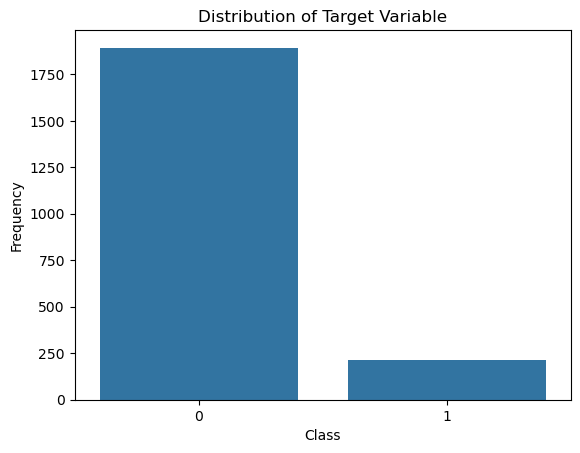

In [11]:
sns.countplot(x='isGoal', data=shotsDataFrame)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

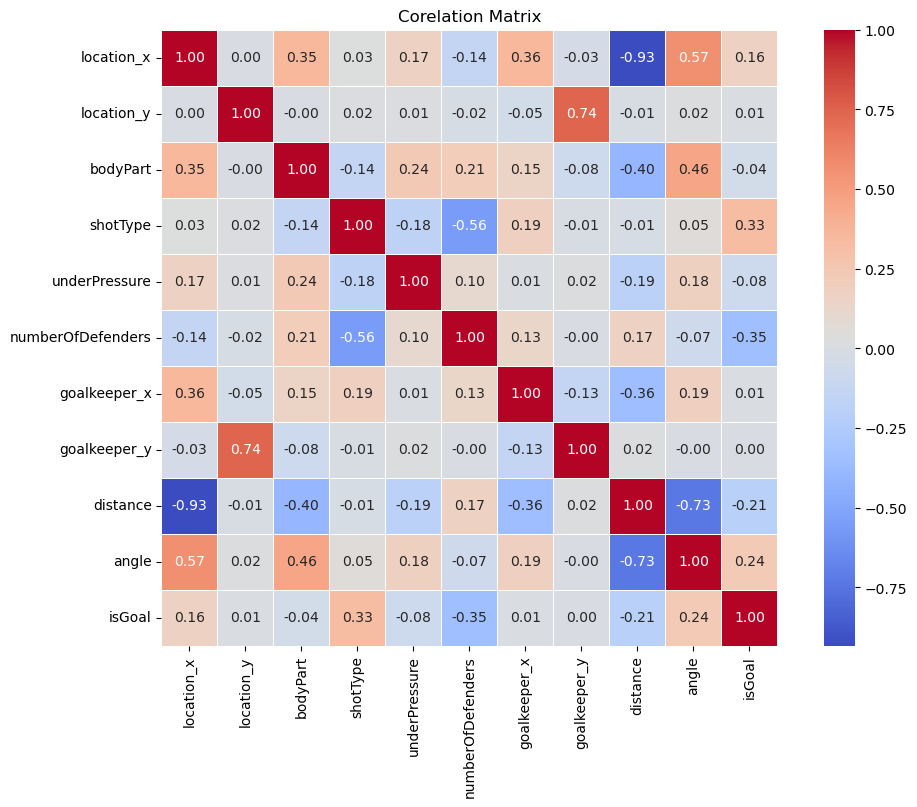

In [12]:
corr_matrix = shotsDataFrame.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Corelation Matrix")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report

In [14]:
x=shotsDataFrame.iloc[:,:-1]
y=shotsDataFrame.iloc[:,-1]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of training data x: ",x_train.shape)
print("Shape of training data y: ",y_train.shape)
print("Shape of testing data x: ",x_test.shape)
print("Shape of testing data y: ",y_test.shape)

Shape of training data x:  (1687, 10)
Shape of training data y:  (1687,)
Shape of testing data x:  (422, 10)
Shape of testing data y:  (422,)


In [15]:
xGmodel=LogisticRegression(max_iter=1000)
xGmodel.fit(x_train, y_train)
y_predict=xGmodel.predict(x_test)
y_predict_proba=xGmodel.predict_proba(x_test)[:, 1]

In [16]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))
print("ROC AUC:", roc_auc_score(y_test, y_predict_proba))

Accuracy: 0.9123222748815166
Precision: 0.72
Recall: 0.375
F1 Score: 0.4931506849315068
ROC AUC: 0.8474543226381461


In [17]:
sample = x_test.iloc[0:1]
xG_probability = xGmodel.predict_proba(sample)[0][1]
goal_prediction = xGmodel.predict(sample)[0]

print("Sample shot features:\n", sample)
print("Predicted xG (probability of goal):", round(xG_probability, 3))
print("Predicted outcome (0 = no goal, 1 = goal):", goal_prediction)


Sample shot features:
      location_x  location_y  bodyPart  shotType  underPressure  \
440        94.6        26.2         1         0              0   

     numberOfDefenders  goalkeeper_x  goalkeeper_y   distance     angle  
440                 10         116.8          38.5  28.906747  0.222393  
Predicted xG (probability of goal): 0.017
Predicted outcome (0 = no goal, 1 = goal): 0


In [18]:
for i in range(5):
    sample = x_test.iloc[i:i+1]
    xg_probability = xGmodel.predict_proba(sample)[0][1]
    goal_prediction = xGmodel.predict(sample)[0]
    actualValue = y_test.iloc[i]

    print("Predicted xG:", round(xg_probability, 3))
    print("Predicted outcome:", goal_prediction)
    print("Actual outcome:", actualValue)
    print("\n")


Predicted xG: 0.017
Predicted outcome: 0
Actual outcome: 0


Predicted xG: 0.205
Predicted outcome: 0
Actual outcome: 1


Predicted xG: 0.018
Predicted outcome: 0
Actual outcome: 0


Predicted xG: 0.078
Predicted outcome: 0
Actual outcome: 0


Predicted xG: 0.084
Predicted outcome: 0
Actual outcome: 0




In [39]:
import pickle
fileName='xGmodel.sav'
pickle.dump(xGmodel, open(fileName, 'wb'))

In [43]:
loadedModel=pickle.load(open('xGmodel.sav', 'rb'))
sample = x_test.iloc[0:1]
xG_probability = loadedModel.predict_proba(sample)[0][1]
goal_prediction = loadedModel.predict(sample)[0]

print("Sample shot features:\n", sample)
print("Predicted xG (probability of goal):", round(xG_probability, 3))
print("Predicted outcome (0 = no goal, 1 = goal):", goal_prediction)

Sample shot features:
      location_x  location_y  bodyPart  shotType  underPressure  \
440        94.6        26.2         1         0              0   

     numberOfDefenders  goalkeeper_x  goalkeeper_y   distance     angle  
440                 10         116.8          38.5  28.906747  0.222393  
Predicted xG (probability of goal): 0.017
Predicted outcome (0 = no goal, 1 = goal): 0


In [51]:
shotsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_x         2109 non-null   float64
 1   location_y         2109 non-null   float64
 2   bodyPart           2109 non-null   int64  
 3   shotType           2109 non-null   int64  
 4   underPressure      2109 non-null   int32  
 5   numberOfDefenders  2109 non-null   int64  
 6   goalkeeper_x       2109 non-null   float64
 7   goalkeeper_y       2109 non-null   float64
 8   distance           2109 non-null   float64
 9   angle              2109 non-null   float64
 10  isGoal             2109 non-null   int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 173.1 KB
